In [40]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df= pd.read_csv('iris_data.csv')
df['color'].value_counts()
df

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),color,0
0,0,5.1,3.5,1.4,0.2,red,0
1,1,4.9,3.0,1.4,0.2,red,0
2,2,4.7,3.2,1.3,0.2,red,0
3,3,4.6,3.1,1.5,0.2,red,0
4,4,5.0,3.6,1.4,0.2,red,0
...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,green,2
146,146,6.3,2.5,5.0,1.9,green,2
147,147,6.5,3.0,5.2,2.0,green,2
148,148,6.2,3.4,5.4,2.3,green,2


In [42]:
x = df.drop(['0','Unnamed: 0'],axis=1)
y = df['0']

In [22]:
# x['color'].value_counts().to_dict()

{'blue': 68, 'red': 64, 'green': 18}

In [43]:
x['color'] = x['color'].replace({'blue': 0, 'red': 1, 'green': 2})

In [34]:
x=pd.get_dummies(x)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),color_blue,color_green,color_red
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1,0
146,6.3,2.5,5.0,1.9,0,1,0
147,6.5,3.0,5.2,2.0,0,1,0
148,6.2,3.4,5.4,2.3,0,1,0


### train test split 

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,stratify=y)


In [45]:
dt_clf = DecisionTreeClassifier(criterion='entropy',random_state=11)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=11)

### Evaluation

In [46]:
### testdata
y_pred = dt_clf.predict(x_test)

acu = accuracy_score(y_test,y_pred)
print('accuracy_score>>\n',acu)

cnf_mtrx = confusion_matrix(y_test,y_pred)
print('confusion_matrix>>\n',cnf_mtrx)

clf_rport = classification_report(y_test,y_pred,target_names=iris.target_names)
print('classification_report>>\n',clf_rport)

accuracy_score>>
 0.9736842105263158
confusion_matrix>>
 [[12  0  0]
 [ 0 12  1]
 [ 0  0 13]]
classification_report>>
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [49]:
### traindata
y_pred = dt_clf.predict(x_train)

acu = accuracy_score(y_train,y_pred)
print('accuracy_score>>\n',acu)

cnf_mtrx = confusion_matrix(y_train,y_pred)
print('confusion_matrix>>\n',cnf_mtrx)

clf_rport = classification_report(y_train,y_pred,target_names=iris.target_names)
print('classification_report>>\n',clf_rport)

accuracy_score>>
 1.0
confusion_matrix>>
 [[38  0  0]
 [ 0 37  0]
 [ 0  0 37]]
classification_report>>
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        38
  versicolor       1.00      1.00      1.00        37
   virginica       1.00      1.00      1.00        37

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



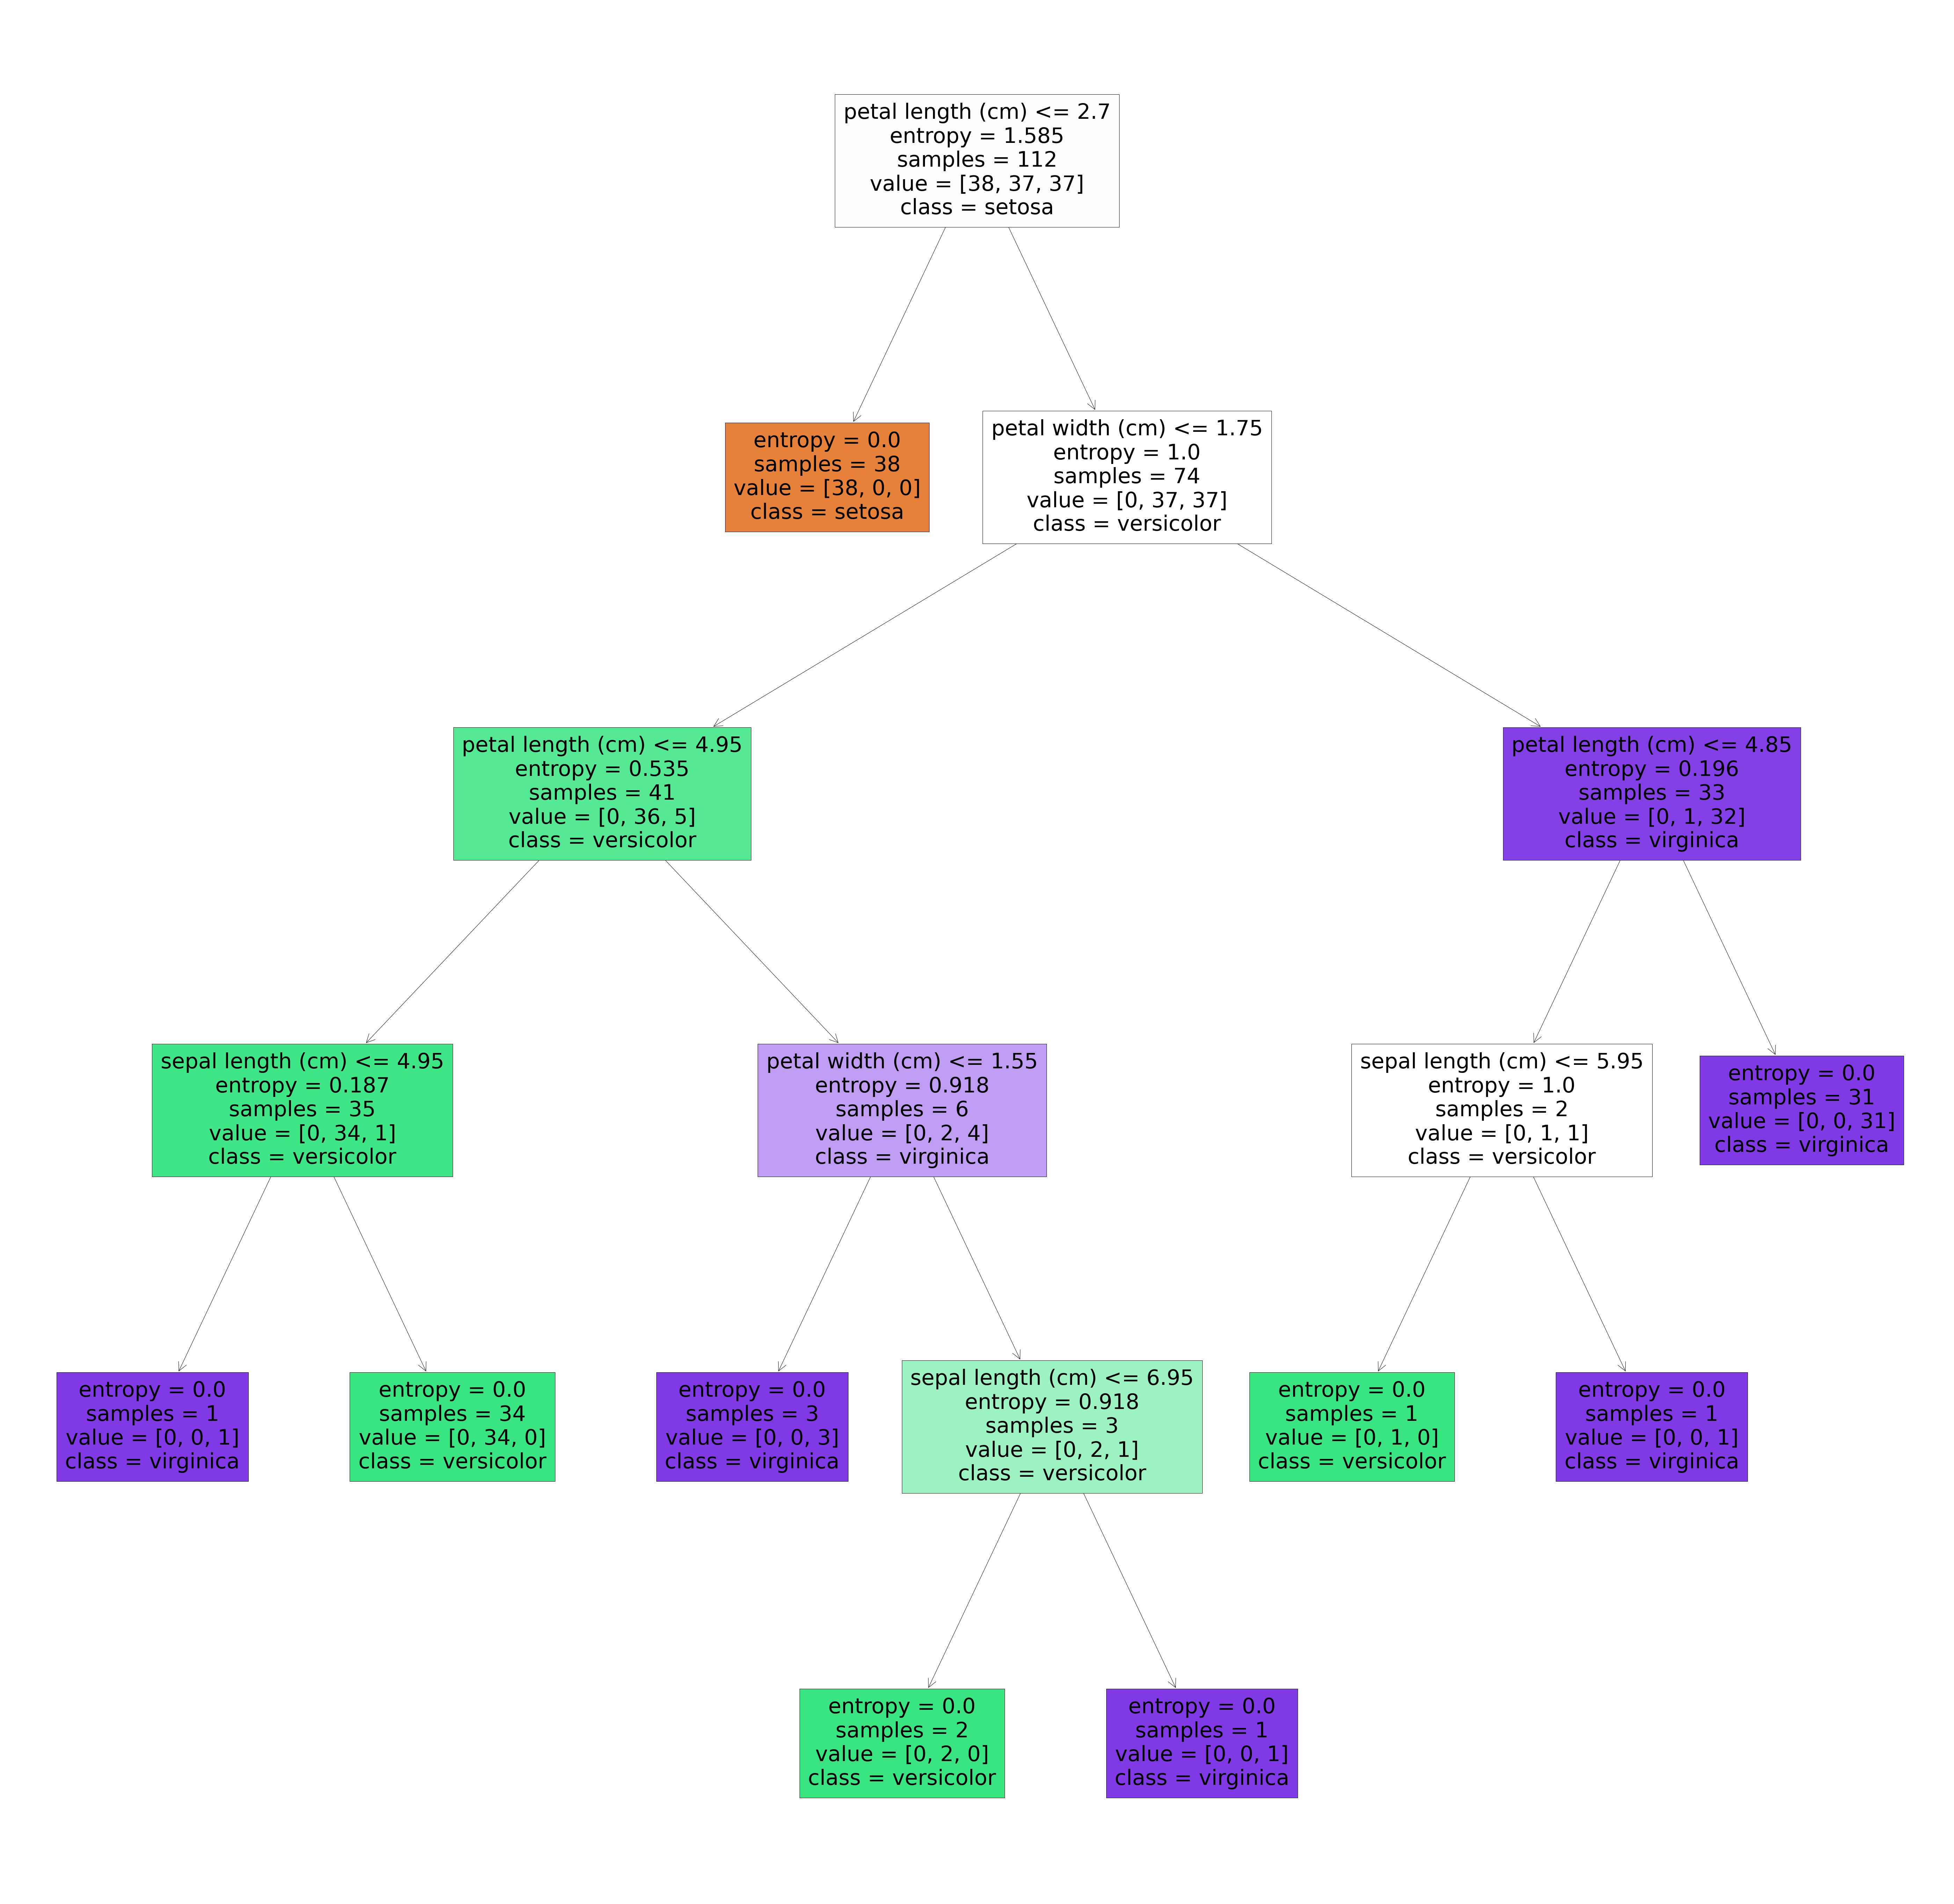

In [50]:
### plot tree
plt.figure(figsize=(100,100))
plot_tree(dt_clf,feature_names=x.columns,class_names=iris.target_names,filled=True)
plt.savefig('IRIS SPECIES DT WITHOUT HY. TUNNING.png')